# Worksheet

[FORM](https://forms.gle/C6J6wrva1XUS56Su5)

## R^2 demo

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# 1. Dataset
x = np.array([1, 2, 3])
y = np.array([2, 3, 4])
data = pd.DataFrame({'x': x, 'y': y})

# 2. Model A: With intercept
X_with_intercept = sm.add_constant(data['x'])  # adds a column of ones
model_with_intercept = sm.OLS(data['y'], X_with_intercept).fit()

# 3. Model B: Without intercept
X_no_intercept = data[['x']]  # no constant
model_no_intercept = sm.OLS(data['y'], X_no_intercept).fit()


yhat_with = model_with_intercept.fittedvalues
yhat_no = model_no_intercept.fittedvalues

r2_with_residual = model_with_intercept.rsquared
r2_no_residual = model_no_intercept.rsquared

# 5. Variance-based R²
def variance_r2(y_true, y_pred):
    return np.var(y_pred, ddof=0) / np.var(y_true, ddof=0)

r2_with_variance = variance_r2(y, yhat_with)
r2_no_variance = variance_r2(y, yhat_no)

# 6. Print results
print("Model WITH intercept:")
print(f"  R² (residual-based): {r2_with_residual:.4f}")
print(f"  R² (variance-based): {r2_with_variance:.4f}")

print("\nModel WITHOUT intercept:")
print(f"  R² (residual-based): {r2_no_residual:.4f}")
print(f"  R² (variance-based): {r2_no_variance:.4f}")

# 4. Show summaries
print("Model A: With Intercept")
print(model_with_intercept.summary())
print("\nModel B: No Intercept")
print(model_no_intercept.summary())


Model WITH intercept:
  R² (residual-based): 1.0000
  R² (variance-based): 1.0000

Model WITHOUT intercept:
  R² (residual-based): 0.9852
  R² (variance-based): 2.0408
Model A: With Intercept
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.932e+30
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           4.58e-16
Time:                        09:07:19   Log-Likelihood:                 100.96
No. Observations:                   3   AIC:                            -197.9
Df Residuals:                       1   BIC:                            -199.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 c

/Users/lance/Documents/BostonUniversity/CURRENT-SEMESTER/CS506-Spring2025/lecture_18/env/lib/python3.13/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/lance/Documents/BostonUniversity/CURRENT-SEMESTER/CS506-Spring2025/lecture_18/env/lib/python3.13/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


## Simulate and Count

What is the probability that a fair coin generated this sequence of coin tosses.

Dataset of coin tosses:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Probability that a fair coin generates it:  8.999999999999986e-09

We simulated a fair coin being flipped 10 times.
In our 1000 simulations, this was the count of the number of Heads (out of 6) we observed: 


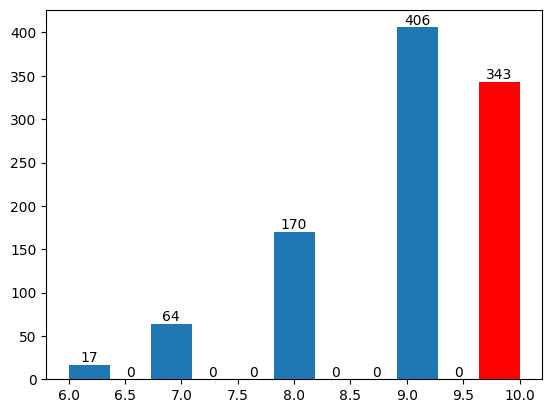

In [ ]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

def num_successes(flips):
    return sum(flips)

SAMPLE_SIZE = 10
og_flips = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
print("Dataset of coin tosses: ", og_flips)
print("Probability that a fair coin generates it: ", binom.pmf(num_successes(og_flips), SAMPLE_SIZE, .9))
print()

p_est = []
NUM_SIMULATIONS = 1000

print("We simulated a fair coin being flipped "
      + str(SAMPLE_SIZE)
      + " times.\nIn our "
      + str(NUM_SIMULATIONS)
      + " simulations, this was the count of the number of Heads (out of 6) we observed: "
    )

for _ in range(NUM_SIMULATIONS):
    flips = [np.random.choice([0, 1], p=[.1, .9]) for _ in range(SAMPLE_SIZE)]
    p_est.append(num_successes(flips))

fig, ax = plt.subplots()
_, bins, patches = ax.hist(p_est, bins=SAMPLE_SIZE + 1)
p = np.digitize([num_successes(og_flips)], bins)
patches[p[0]-1].set_facecolor('r')
ax.bar_label(patches)
plt.show()


In Linear Regression, our most pressing question is whether there is in fact a true relationship between our predictors `X` and our target `y` - or if the relationship we observed was just a fluke.

Through simulations and counting, let's see just how likely or unlikely it is to observe linear relationships in data that was generated by an `X` and `y` that are not linearly related.

True beta =  [0 0]
Observed beta =  [0.49093843 4.42227253]


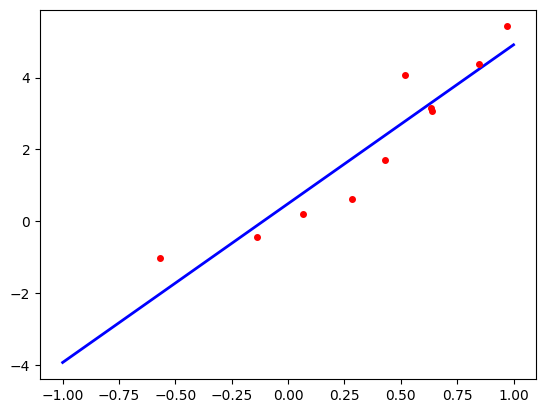

In [73]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 10

xlin = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
y = 5.0 * xlin + np.random.randn(SAMPLE_SIZE) # beta = 0 means there is no relationship between x and y.

intercept = np.ones(np.shape(xlin)[0])
X = np.array([intercept, xlin]).T
beta = np.linalg.inv(X.T @ X) @ X.T @ y

print("True beta = ", np.array([0, 0]))
print("Observed beta = ", beta)

xplot = np.linspace(-1,1,20)
yestplot = beta[0] + beta[1] * xplot
plt.plot(xplot, yestplot,'b-',lw=2)
plt.plot(xlin, y,'ro',markersize=4)
plt.show()

Lets see what happens if we repeat this 1000 times and record the estimated intercept and slope each time to plot them in a histogram.

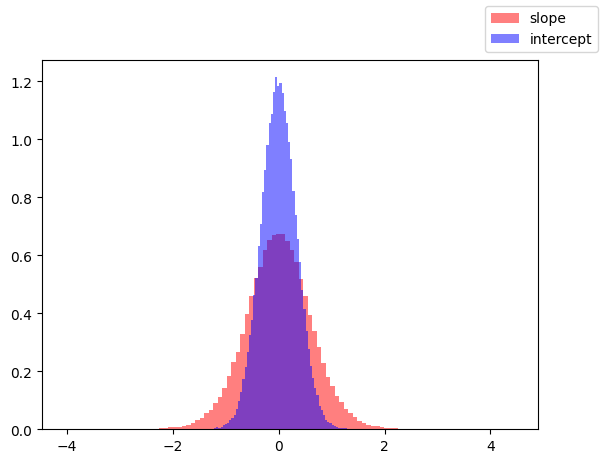

In [74]:
NUM_TRIALS = 100000
inter = []
slope = []
for _ in range(NUM_TRIALS):

    xlin = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
    y = 0.0 * xlin + np.random.randn(SAMPLE_SIZE)

    intercept = np.ones(np.shape(xlin)[0])
    X = np.array([intercept, xlin]).T
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    inter.append(beta[0])
    slope.append(beta[1])

fig, ax = plt.subplots()
ax.hist(slope, bins=100, density=True, color='r', alpha=.5, label="slope")
ax.hist(inter, bins=100, density=True, color='b', alpha=.5, label="intercept")
fig.legend()
plt.show()

If we then encountered a dataset of size 100 as above and the slope was say 2, we would have a lot of evidence / reasonable grounds to say that most likely this dataset was NOT generated with a true slope of 0.

Running these simulations can be expensive sometimes so computing these probabilities directly (instead of through simulations) would be nice. What we want to know is: given a true beta, what is the probability of observing a range of estimated betas on a dataset of a specific size N.

Lets take this one step at a time.

## Computing Probabilities

We know that:

$$\hat\beta-\beta \sim \mathcal{N}(0,\sigma^2 (X^TX)^{-1})$$

thus for each component $k$ of $\hat\beta$ (here there are only two - one slope and one intercept)

$$\hat\beta_k -\beta_k \sim \mathcal{N}(0, \sigma^2 S_{kk})$$

where $S_{kk}$ is the $k^\text{th}$ diagonal element of $(X^TX)^{-1}$. Thus, we know that 

$$z_k = \frac{\hat\beta_k -\beta_k}{\sqrt{\sigma^2 S_{kk}}} \sim \mathcal{N}(0,1)$$

Verify that this is the case through a simulation and compare it to the standard normal pdf by plotting it on top of the histogram.

In [ ]:
from scipy.stats import norm

beta_hist = []
for _ in range(1000):
    ...

xs = np.linspace(-10,10,1000)
fig, ax = plt.subplots()
ax.hist(beta_hist, bins=100, density=True)
ax.plot(xs, norm.pdf(...), color='green')
plt.show()

#### FORM Q1

Use the CDF of a standard normal distribution, to provide the probability that the following dataset's true slope is greater than 0. Assume that $\sigma^2 = 1$

0.5343081689853527


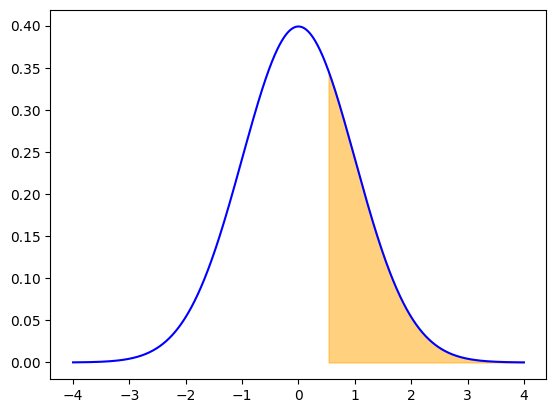

In [ ]:
from scipy.stats import norm

x = np.array([-0.1920605, -0.11290798, -0.56434374, -0.67052057, -0.19233284, -0.42403586, -0.8114285, -0.38986946, -0.37384161, -0.50930229])
y = np.array([-0.34063108, -0.33409286, 0.34245857, 0.11062295, 0.76682389, 0.86592388, -1.68912015, -2.01463592, 1.61798563, 0.60557414])

intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

z = beta_hat[1]/((X.T @ X)[1][1])
print(z)

x = np.linspace(-4, 4, 1000)
pdf = norm.pdf(x, loc=0, scale=1)

fig, ax = plt.subplots()
ax.plot(x, pdf, color="blue")
x_fill = np.linspace(z, 4, 1000)
pdf_fill = norm.pdf(x_fill, loc=0, scale=1)
ax.fill_between(x_fill, pdf_fill, color="orange", alpha=0.5, label=f"Area to the right of {z}")
plt.show()

In practice we don't know the standard deviation and need to use an unbiased estimate of the standard deviation instead. This estimate is the standard error `s`

$$s = \sqrt{\frac{RSS}{n - p}}$$

where p is the number of parameters beta (here there are 2 - one slope and one intercept). This normalized $\hat\beta$ can be shown to follow a t-distribution with `n-p` degrees of freedom. Verify this is the case with a simulation.

In [ ]:
from scipy.stats import t

def standard_error(ytrue, ypred):
    ...

beta_hist = []
for _ in range(1000):
    ...

xs = np.linspace(-10,10,1000)
fig, ax = plt.subplots()
ax.hist(beta_hist, bins=100, density=True)
ax.plot(xs, t.pdf(xs, SAMPLE_SIZE - 2), color='red')
plt.show()

#### FORM Q2

Use a t distribution to provide the probability that the following dataset's true slope is greater than 0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([-0.1920605, -0.11290798, -0.56434374, -0.67052057, -0.19233284, -0.42403586, -0.8114285, -0.38986946, -0.37384161, -0.50930229])
y = np.array([-0.34063108, -0.33409286, 0.34245857, 0.11062295, 0.76682389, 0.86592388, -1.68912015, -2.01463592, 1.61798563, 0.60557414])

...

### Confidence Intervals

Let's start by constructing a 50% confidence interval around the estimated true mean age of a population where age follows a normal distribution with mean 50 and standard deviation 10.

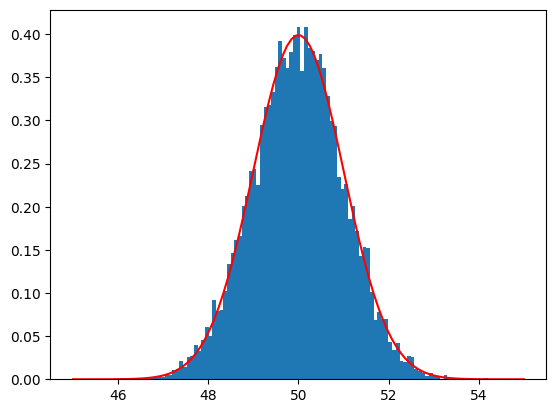

In [46]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

true_mean_age = 50
true_stdev_age = 10
SAMPLE_SIZE = 100
TRIALS = 10000

mean_hist = []
for _ in range(TRIALS):
    sample_ages = true_mean_age + np.random.randn(SAMPLE_SIZE) * true_stdev_age
    mean_hist.append(np.mean(sample_ages))

xs = np.linspace(45,55,100)
fig, ax = plt.subplots()
ax.hist(mean_hist, bins=100, density=True)
ax.plot(xs, norm.pdf(xs, true_mean_age, true_stdev_age / (SAMPLE_SIZE ** (1/2))), color='red')
plt.show()

We want to define a process that, given a confidence level (say 95%) creates an interval around the sample mean (our estimate of the true mean) where if the process is repeated many times 95% of these intervals contain the true mean.

4.100000000000001


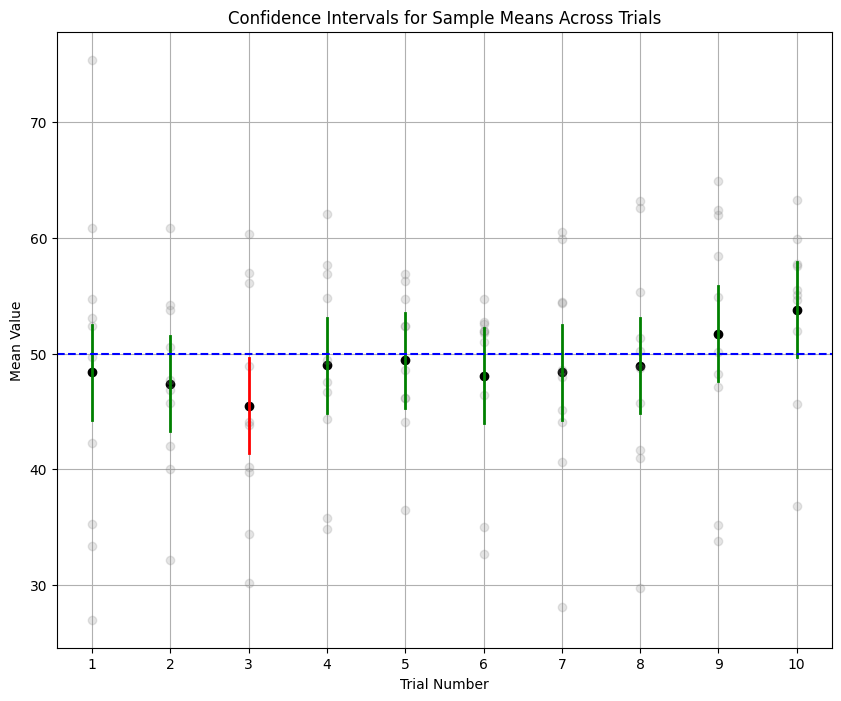

In [60]:
SAMPLE_SIZE = 10
CONFIDENCE_LEVEL = .1

def search(alpha, sample_size, spread):
    d = 3
    epsilon = .0001
    delta = 1 * 10 ** (-d)
    i = 45
    while i < 55:
        i += epsilon
        val = norm.cdf(i, loc=true_mean_age, scale=spread / (sample_size ** (1/2))) # alternative to math is to simulate this every time...
        if abs(alpha - val) < delta:
            return round(i, ndigits=d-2)
    ValueError("couldn't find anything")

def confidence_width(conf_level, sample_size, spread):
    sample_avg_age = search(conf_level, sample_size, spread)
    return true_mean_age - sample_avg_age

plt.figure(figsize=(10, 8))
width = confidence_width(CONFIDENCE_LEVEL, SAMPLE_SIZE, true_stdev_age)
print(width)
for i in range(10):
    sample_ages = true_mean_age + np.random.randn(SAMPLE_SIZE) * true_stdev_age
    sample_mean = np.mean(sample_ages)
    
    ci_lower = sample_mean - width
    ci_upper = sample_mean + width

    contains_true_mean = ci_lower <= true_mean_age <= ci_upper
    ci_color = 'green' if contains_true_mean else 'red'
    
    plt.plot(i + 1, sample_mean, 'o', color='black')
    plt.plot(np.ones_like(sample_ages) + i, sample_ages, 'o', color='grey', alpha=.2)
    plt.plot([i + 1, i + 1], [ci_lower, ci_upper], color=ci_color, linewidth=2)

plt.axhline(y=true_mean_age, color='blue', linestyle='--', label='True Mean')

plt.xticks(range(1, 10 + 1))
plt.xlabel("Trial Number")
plt.ylabel("Mean Value")
plt.title("Confidence Intervals for Sample Means Across Trials")
plt.grid(True)
plt.show()

Let's do this with an even simpler dataset. Let's say we have a random variable X that follows a standard normal distribution. What interval, centered around X would contain 0 50% of the time? 

In [45]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

TRIALS = 1000
count = 0
for _ in range(TRIALS):
    X = np.random.randn()
    ci_lower = X - 2.327
    ci_upper = X + 2.327
    if ci_lower < 0 and ci_upper > 0:
        count += 1

print(count / TRIALS)


0.983


Let's search for this value

In [51]:

def search(alpha):
    d = 3
    epsilon = .0001
    delta = 1 * 10 ** (-d)
    i = 45
    while i < 55:
        i += epsilon
        val = norm.cdf(i, loc=true_mean_age, scale=true_stdev_age / (SAMPLE_SIZE ** (1/2))) # alternative to math is to simulate this every time...
        if abs(alpha - val) < delta:
            return round(i, ndigits=d-2)
    ValueError("couldn't find anything")

t_alpha = search(.01)
print(t_alpha)

47.6


## Extra

From worksheet 15, we know that, provided the assumptions from linear regression hold:

$$\hat\beta \sim \mathcal{N}(\beta,\sigma^2 (X^TX)^{-1})$$

thus for each component $k$ of $\hat\beta$

$$\hat\beta_k \sim \mathcal{N}(\beta_k, \sigma^2 S_{kk})$$

where $S_{kk}$ is the $k^\text{th}$ diagonal element of $(X^TX)^{-1}$. 

While we know that the estimate of beta is an unbiased estimator, we don't know the standard deviation. So in practice we use an unbiased estimate of the standard deviation instead. This estimate is the standard error `s`

$$s = \sqrt{\frac{RSS}{n - p}}$$

where p is the number of parameters beta (the intercept counts as one such parameter). This normalized $\hat\beta$ can be shown to follow a t-distribution with `n-p` degrees of freedom. Below we can see this is the case through a simulation:

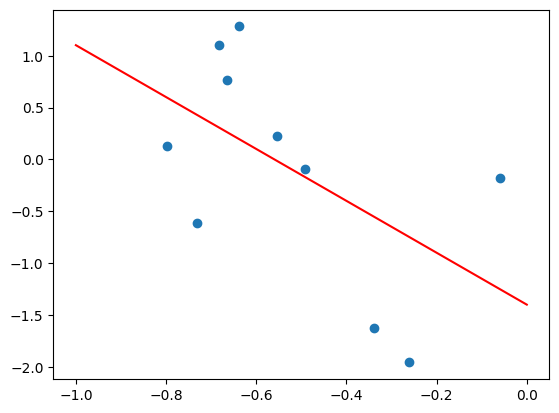

In [2]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt

SAMPLE_SIZE = 10

x = -1.0 + 1.0 * np.random.random(SAMPLE_SIZE)
y = 0.0 * x + np.random.randn(SAMPLE_SIZE)
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
xs = np.linspace(-1, 0, 100)

plt.scatter(x, y)
plt.plot(xs, beta_hat[0] + beta_hat[1] * xs, c='r')
plt.show()

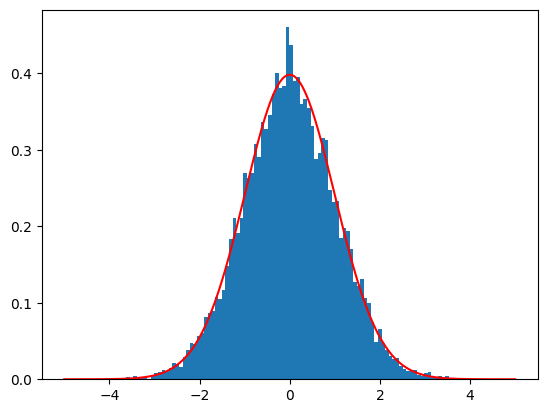

In [3]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt

def standard_error(ytrue, ypred):
    return (sum((ytrue - ypred)**2) / (len(ytrue) - 2)) ** (1/2)

def normalized(beta, mu, sig, skk):
    return (beta - mu) / (((sig ** 2) * skk) ** (1/2))

SAMPLE_SIZE = 100
TRIALS = 10000

beta_hist = []
for _ in range(TRIALS):
    x = -1.0 + 1.0 * np.random.random(SAMPLE_SIZE)
    y = 0.0 * x + np.random.randn(SAMPLE_SIZE)
    intercept = np.ones(np.shape(x)[0])
    X = np.array([intercept, x]).T
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    skk = np.linalg.inv(X.T @ X)[1][1]
    s = standard_error(y, X @ beta)
    beta_hist.append(normalized(beta[1], 0, s, skk))

xs = np.linspace(-5,5,1000)
fig, ax = plt.subplots()
ax.hist(beta_hist, bins=100, density=True)
ax.plot(xs, t.pdf(xs, SAMPLE_SIZE - 2), color='red')
plt.show()

The probability that normalized $\hat\beta$ is less than 0 can be found by evaluating the CDF of the t-distribution above. This clearly evaluates to .5.

a) What is the probability that normalized $\hat\beta$ is less than -2?

In [4]:
print(t.cdf(-2, SAMPLE_SIZE -2))

0.024133885974683796


b) Still assuming that there is no relationship between X and Y. What value would the normalized $\hat\beta$ only be less than ~1% of the time? Another way to phrase this is: what value would the normalized $\hat\beta$ be greater than 99% of the time? i.e.

$$\int_{-\infty}^{x} t_{pdf}(t)dt = .01 $$

In [5]:
from scipy.stats import norm

def search(alpha, df):
    d = 4
    epsilon = .001
    delta = 1 * 10 ** (-d)
    i = -5
    while i < 5:
        i += epsilon
        val = t.cdf(i, df) # alternative to math is to simulate this every time...
        if abs(alpha - val) < delta:
            return round(i, ndigits=d-2)
    ValueError("couldn't find anything")

t_alpha = search(.01, SAMPLE_SIZE - 2)
print(t_alpha)
print(t.cdf(t_alpha, SAMPLE_SIZE - 2))

-2.37
0.009873264817099584


c) What value of $\hat\beta$ does the above translate to? i.e. what value would $\hat\beta$ only be less than 1% of the time (assuming there is no relationship between X and Y)?

In [6]:
skk = np.linalg.inv(X.T @ X)[1][1]
s = standard_error(y, X @ beta)
t_alpha = search(.01, SAMPLE_SIZE - 2)
beta_hat = t_alpha * ((s ** 2) * skk) ** (1/2)

print(t_alpha)
print(beta_hat)
print(t.cdf(normalized(beta_hat, 0, s, skk), SAMPLE_SIZE - 2))

-2.37
-0.9299024849847981
0.009873264817099584


d) So what range of values [-t, t] is expected to hold $\hat\beta$ ~98% of the time?

e) Verify this by running a simulation where you fix the interval and record the number of times in a given number of TRIALS that $\hat\beta$ falls in the interval.

In [8]:
interval_min = -0.9299024849847981
interval_max = 0.9299024849847981

TRIALS = 10000
SAMPLE_SIZE = 100

count = 0
for _ in range(TRIALS):
    x = -1.0 + 1.0 * np.random.random(SAMPLE_SIZE)
    y = 0.0 * x + np.random.randn(SAMPLE_SIZE)
    intercept = np.ones(np.shape(x)[0])
    X = np.array([intercept, x]).T
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    if beta[1] > interval_min and beta[1] < interval_max :
        count += 1

print(count / TRIALS)

0.9916


f) For the dataset below, report the 99% confidence interval around the estimate of the slope

In [20]:
x = np.array([-0.1920605, -0.11290798, -0.56434374, -0.67052057, -0.19233284, -0.42403586, -0.8114285, -0.38986946, -0.37384161, -0.50930229])
y = np.array([-0.34063108, -0.33409286, 0.34245857, 0.11062295, 0.76682389, 0.86592388, -1.68912015, -2.01463592, 1.61798563, 0.60557414])

intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
print(beta_hat)

skk = np.linalg.inv(X.T @ X)[1][1]
s = standard_error(y, X @ beta)
t_alpha = search(.2, len(x) - 2)

print("60% CI around the slope is: [", beta_hat[1] + t_alpha * ((s ** 2) * skk) ** (1/2) , ", ", beta_hat[1] - t_alpha * ((s ** 2) * skk) ** (1/2) ,"]")


[0.50155603 1.19902827]
60% CI around the slope is: [ -0.4639483573379881 ,  2.862004901319229 ]


g) Based on this confidence interval, what can you deduce about the relationship between x and y?

## The importance of the independence assumption

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.832e+04
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           3.49e-68
Time:                        09:58:29   Log-Likelihood:                -55.683
No. Observations:                  50   AIC:                             115.4
Df Residuals:                      48   BIC:                             119.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2847      0.230     -5.591      0.0

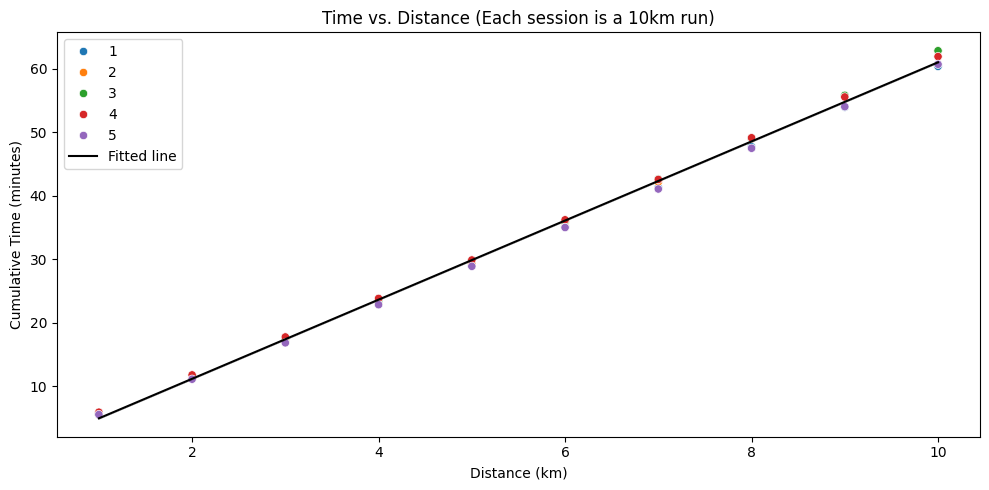

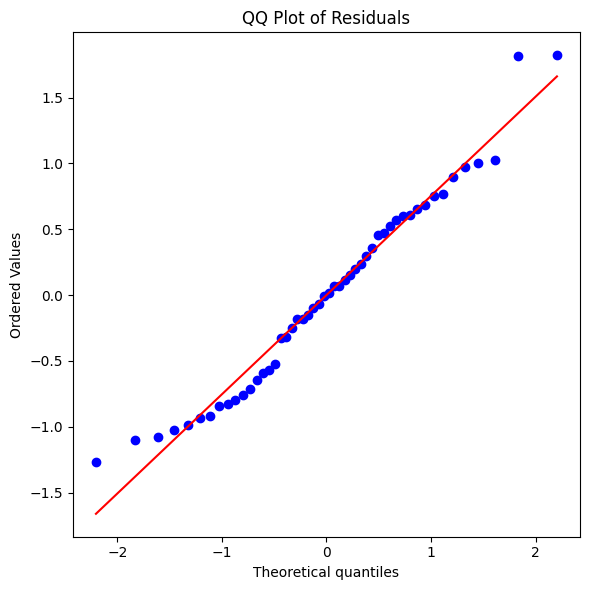

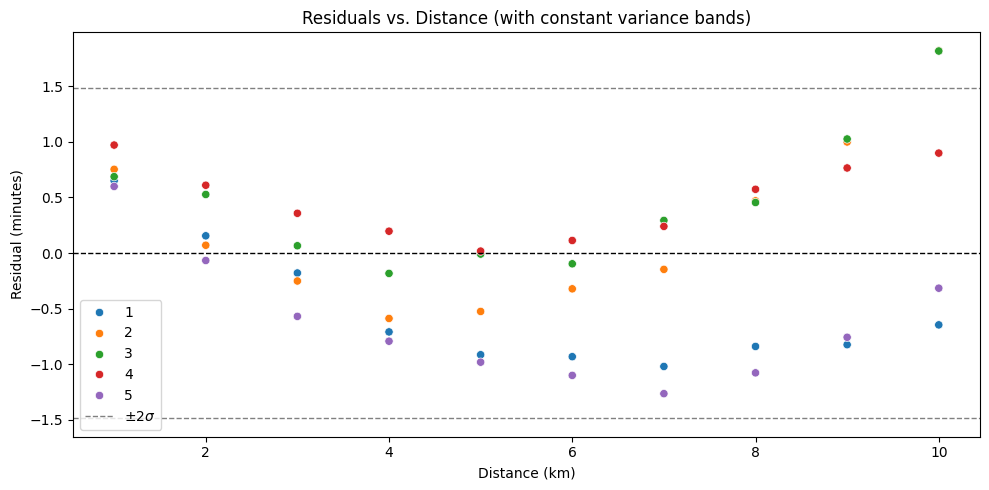

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
from statsmodels.stats.diagnostic import acorr_ljungbox

# Seed for reproducibility
np.random.seed(42)

# Simulate 5 sessions of 10km runs, with 1km splits
num_sessions = 5
km_splits = np.arange(1, 11)  # km 1 to 10

# Each session has a base pace and a slight pacing trend across the 10km
session_pace_base = np.random.normal(loc=5.5, scale=0.2, size=num_sessions)
session_pace_slope = np.random.normal(loc=0.05, scale=0.02, size=num_sessions)

# Generate time data with slightly linear residual patterns across sessions
data = []
for session_id in range(num_sessions):
    base = session_pace_base[session_id]
    slope = session_pace_slope[session_id]
    for km in km_splits:
        pace = base + slope * km
        time = pace * km + np.random.normal(0, 0.1)  # cumulative time
        data.append((session_id + 1, km, time))

df = pd.DataFrame(data, columns=["session", "distance", "time"])

# Fit linear regression
X = add_constant(df["distance"])
model = OLS(df["time"], X).fit()
df["fitted"] = model.fittedvalues
df["residuals"] = model.resid

# Print regression summary
print(model.summary())

# Ljung-Box test for autocorrelation
ljung_box_result = acorr_ljungbox(df["residuals"], lags=[5], return_df=True)
print("\nLjung-Box test result:")
print(ljung_box_result)

# --- PLOTS ---

# 1. Distance vs Time
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="distance", y="time", hue="session", palette="tab10")
sns.lineplot(x=df["distance"], y=df["fitted"], color="black", label="Fitted line")
plt.title("Time vs. Distance (Each session is a 10km run)")
plt.xlabel("Distance (km)")
plt.ylabel("Cumulative Time (minutes)")
plt.legend()
plt.tight_layout()
plt.show()

# 2. QQ plot for residuals
plt.figure(figsize=(6, 6))
stats.probplot(df["residuals"], dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.tight_layout()
plt.show()

# 3. Residuals vs Distance with ±2σ bands
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="distance", y="residuals", hue="session", palette="tab10")

resid_std = df["residuals"].std()
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.axhline(2 * resid_std, color="gray", linestyle="--", linewidth=1, label=r'$\pm 2\sigma$')
plt.axhline(-2 * resid_std, color="gray", linestyle="--", linewidth=1)

plt.title("Residuals vs. Distance (with constant variance bands)")
plt.xlabel("Distance (km)")
plt.ylabel("Residual (minutes)")
plt.legend()
plt.tight_layout()
plt.show()


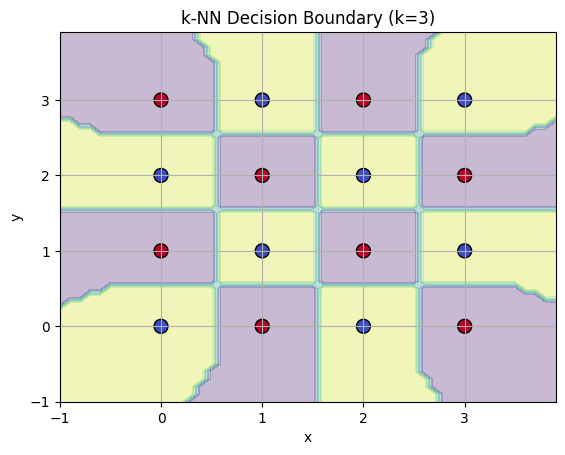

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Create a 4x4 lattice grid
x_coords = np.arange(4)
y_coords = np.arange(4)
X = np.array([[x, y] for x in x_coords for y in y_coords])

# Step 2: Assign classes in a checkerboard pattern
# Class 0 if (x + y) % 2 == 0, else Class 1
y = np.array([(x + y) % 2 for x, y in X])

# Step 3: Train k-NN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# Step 4: Plot decision boundary
def plot_decision_boundary(clf, X, y, resolution=0.1):
    # Setup grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    
    # Predict for each point on the grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot contour
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=100)
    plt.title("k-NN Decision Boundary (k=3)")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()

plot_decision_boundary(knn, X, y)


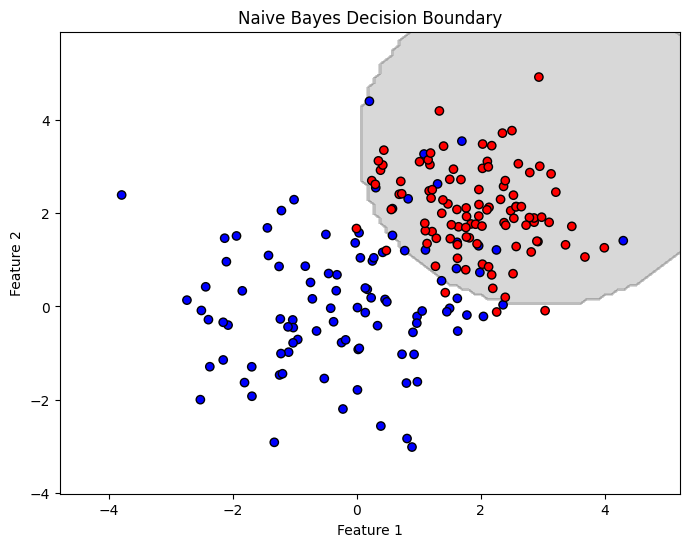

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import ListedColormap

# Create a 2D grid for visualization
def plot_decision_boundary(clf, X, y, ax):
    h = 0.1
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['white', 'gray']))
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=ListedColormap(['blue', 'red']))
    ax.set_title("Naive Bayes Decision Boundary")

# Generate class 0: mean = (0,0), var = (1, 5)
mean0 = [0, 0]
cov0 = [[2, 0], [0, 2]]  # Diagonal covariance, features independent
X0 = np.random.multivariate_normal(mean0, cov0, 100)

# Generate class 1: mean = (2,2), var = (5, 1)
mean1 = [2, 2]
cov1 = [[1, 0], [0, 1]]  # Diagonal but different variances
X1 = np.random.multivariate_normal(mean1, cov1, 100)

# Combine data
X = np.vstack((X0, X1))
y = np.array([0]*100 + [1]*100)

# Fit Naive Bayes (assumes independence)
clf = GaussianNB()
clf.fit(X, y)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_boundary(clf, X, y, ax)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


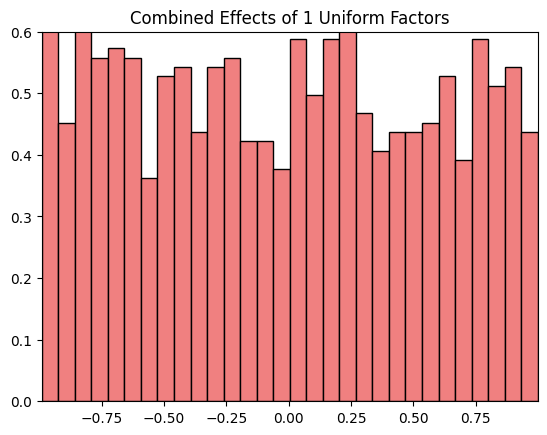

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Configuration
num_linea = 1000       # Number of individuals (Linea)
max_factors = 20       # Number of hidden factors to combine

# Set random seed for reproducibility
np.random.seed(42)

# Generate hidden factors from a UNIFORM distribution [-1, 1]
# Feel free to try np.random.exponential, np.random.chisquare, etc.
all_factors = np.random.uniform(low=-1, high=1, size=(max_factors, num_linea))

# Cumulative sum across factors
summed_effects = np.cumsum(all_factors, axis=0)

# Set up plot
fig, ax = plt.subplots()
ax.set_xlim(-5, 5)
ax.set_ylim(0, 0.6)
title = ax.set_title('Combined Effects of 1 Hidden Factor')

# Animation update function
def update(frame):
    ax.clear()
    data = summed_effects[frame]
    ax.set_xlim(np.min(data), np.max(data))
    ax.set_ylim(0, 0.6)
    
    ax.hist(data, bins=30, density=True, color='lightcoral', edgecolor='black')
    ax.set_title(f'Combined Effects of {frame + 1} Uniform Factors')

# Create animation
ani = animation.FuncAnimation(fig, update, frames=max_factors, repeat=False, interval=500)

# To save the animation, uncomment the following line:
ani.save("clt_uniform_animation.mp4", writer='ffmpeg', fps=2)

# Show the animation
# plt.show()


In [ ]:
llm_backend:
  type: "llama_stack"
  base_url: "http://localhost:8321"
  model_map:
    main: "openai/gpt-4"
    summarizer: "anthropic/claude-3-opus"
    validator: "mistral/mistral-medium"
  credentials:
    main:
      credentials_path: "${OPENAI_API_KEY}"
    summarizer:
      credentials_path: "${ANTHROPIC_API_KEY}"
    validator:
      credentials_path: "${MISTRAL_API_KEY}"
query_validation_method: disabled


summarizer:
    model: "openai/gpt-3.5-turbo"
    llama_stack_url: "http://localhost:8321"

mcp_tools:
    server_url: "http://localhost:9000/mcp"
    include_all: true     # we can filter later
    refresh_on_start: true

In [ ]:
from llama_stack.agent import AgentBuilder, ToolCallResult
from llama_stack.schema import ToolSpec
import re

config = {}

redaction_config = config["config"]["query_filter"]
model_id = config.get("default_model", "openai/gpt-4")

REDACTION_RULES = [
    (re.compile(rule["pattern"]), rule["replacement"])
    for rule in redaction_config.get("patterns", [])
]

class RegexRedactorTool(ToolSpec):
    name = "redact_sensitive_info"
    input_spec = {"text": "string"}
    output_spec = {"redacted_text": "string"}

    async def call(self, args, context=None):
        text = args["text"]

        for pattern, repl in REDACTION_RULES:
            text = re.sub(pattern, repl, text)
        return ToolCallResult(result={"redacted_text": text})
    


In [ ]:
from llama_stack.safety.shield import BaseShield, ShieldViolation

KEYWORDS = []
client = {}

class KeywordBlocklistShield(BaseShield):
    def __init__(self, blocklist):
        self.blocklist = blocklist

    def check(self, messages):
        user_msg = next((m["content"] for m in messages if m["role"] == "user"), "")
        for term in self.blocklist:
            if term.lower() in user_msg.lower():
                return ShieldViolation(
                    user_message="Your question contains blocked content.",
                    code="BLOCKED_QUERY",
                )
        return None
    
client.shields.register(
    shield_id="keyword_safeguard",
    shield_instance=KeywordBlocklistShield(blocklist=KEYWORDS)
)

response = client.safety.run_shield(shield_id="keyword_safeguard", messages="Sorry I can't help you with that")

In [ ]:
from llama_stack.agent import ToolSpec, ToolCallResult
from llama_stack_client import LlamaStackClient

class ValidateQuestionWithLLMTool(ToolSpec):
    name = "validate_question"
    description = "Uses an LLM to determine if a user question is appropriate, safe, and allowed."

    input_spec = {
        "text": "string"
    }

    output_spec = {
        "verdict": "string"  # Expected: "safe", "unsafe", or "uncertain"
    }

    def __init__(self, model_id: str, llama_stack_url: str):
        self.model_id = model_id
        self.client = LlamaStackClient(base_url=llama_stack_url)

    async def call(self, args, context=None):
        user_text = args["text"]

        response = self.client.inference.chat_completion(
            model_id=self.model_id,
            messages=[
                {
                    "role": "system",
                    "content": (
                        "You are a strict query safety auditor. "
                        "Your job is to classify whether the user's input is safe, unsafe, or uncertain "
                        "Reply ONLY with one word: 'safe', 'unsafe', or 'uncertain'."
                    )
                },
                {
                    "role": "user",
                    "content": f"Input: {user_text}\nVerdict:"
                }
            ],
            stream=False
        )

        verdict = response.completion_message.content.strip().lower()
        if verdict not in ("safe", "unsafe", "uncertain"):
            verdict = "uncertain"

        return ToolCallResult(result={"verdict": verdict})
    

validator_model = config["rcs_config"]["model_map"]["validator"]
llama_stack_url = config["rcs_config"]["llama_stack"]["base_url"]

agent = AgentBuilder("core-agent") \
    .with_model(model_id) \
    .with_tool(RegexRedactorTool()) \
    .with_tool(ValidateQuestionWithLLMTool(model_id=validator_model, llama_stack_url=llama_stack_url)) \
    .build()

In [ ]:
from llama_stack.agent import ToolSpec, ToolCallResult
from llama_stack_client import LlamaStackClient

class SummarizeDocsTool(ToolSpec):
    name = "summarize_docs"
    description = "Summarizes multiple documentation snippets into a concise summary."
    input_spec = {
        "documents": "array of strings"
    }
    output_spec = {
        "summary": "string"
    }

    def __init__(self, model_id: str, llama_stack_url: str):
        self.model_id = model_id
        self.client = LlamaStackClient(base_url=llama_stack_url)

    async def call(self, args, context=None):
        docs = args.get("documents", [])
        if not docs:
            return ToolCallResult(result={"summary": "No documents provided to summarize."})

        combined_docs = "\n\n".join(f"- {doc.strip()}" for doc in docs)

        response = self.client.inference.chat_completion(
            model_id=self.model_id,
            messages=[
                {
                    "role": "system",
                    "content": (
                        "You are a summarization assistant. Your job is to summarize technical documentation "
                        "into clear, concise bullet points or paragraphs for internal users."
                    )
                },
                {
                    "role": "user",
                    "content": (
                        f"Please summarize the following documentation snippets:\n\n{combined_docs}\n\n"
                        "Summarize the key points in 3–5 concise bullet points."
                    )
                }
            ],
            stream=False
        )

        return ToolCallResult(result={"summary": response.completion_message.content})

agent = AgentBuilder("road-agent") \
    .with_model(model_id) \
    .with_tool(RegexRedactorTool()) \
    .with_tool(ValidateQuestionWithLLMTool(model_id=validator_model, llama_stack_url=llama_stack_url)) \
    .with_tool(SummarizeDocsTool(model_id=model_id, llama_stack_url=llama_stack_url)) \
    .build()

In [ ]:
from langchain.embeddings import HuggingFaceEmbedding
import faiss, pickle
from llama_stack.agent import ToolSpec, ToolCallResult

class RAGTool(ToolSpec):
    name = "doc_search"
    description = "Retrieves documentation chunks from a vector store using a Hugging Face embedding model."

    input_spec = {
        "query": "string"
    }

    output_spec = {
        "results": "array of strings"
    }

    def __init__(self, config: dict):
        ref = config["rcs_config"]["reference_context"]
        model_path = ref["embedding_model"]
        index_path = ref["vector_db_path"]
        self.top_k = 5

        self.embedder = HuggingFaceEmbedding(model_name=model_path)

        # Load FAISS index and associated docs
        with open(index_path, "rb") as f:
            self.index, self.documents = pickle.load(f)

    async def call(self, args, context=None):
        query = args["query"]
        query_vec = self.embedder.embed_query(query)
        D, I = self.index.search([query_vec], self.top_k)

        results = [self.documents[i] for i in I[0] if i < len(self.documents)]
        return ToolCallResult(result={"results": results})

vectorDB = ""    

agent = AgentBuilder("road-agent") \
    .with_model(model_id) \
    .with_tool(RegexRedactorTool()) \
    .with_tool(ValidateQuestionWithLLMTool(model_id=validator_model, llama_stack_url=llama_stack_url)) \
    .with_tool(SummarizeDocsTool(model_id=model_id, llama_stack_url=llama_stack_url)) \
    .with_tool(RAGTool(vectorDB)) \
    .build()

In [ ]:
from llama_stack.agent import ToolSpec, ToolCallResult
import requests

class MCPTool(ToolSpec):
    def __init__(self, name, description, input_schema, output_schema, mcp_url):
        self.name = name
        self.description = description
        self.input_spec = input_schema
        self.output_spec = output_schema
        self.mcp_url = mcp_url

    async def call(self, args, context=None):
        resp = requests.post(
            f"{self.mcp_url}/call",
            json={"tool_name": self.name, "args": args}
        )
        resp.raise_for_status()
        return ToolCallResult(result=resp.json())
    
def load_mcp_tools_from_server(server_url: str) -> list:
    """Discover tools from an MCP server and return them as Llama Stack-compatible ToolSpecs."""
    resp = requests.get(f"{server_url}/tools")
    resp.raise_for_status()
    tools = resp.json()

    return [
        MCPTool(
            name=tool["name"],
            description=tool.get("description", ""),
            input_schema=tool["inputs"],
            output_schema=tool["outputs"],
            mcp_url=server_url
        )
        for tool in tools
    ]

if config.get("mcp_tools", {}).get("enable", False):
    mcp_url = config["mcp_tools"]["server_url"]
    try:
        tools = load_mcp_tools_from_server(mcp_url)
        print(f"[MCP] Loaded {len(tools)} tools from MCP server.")
        for tool in tools:
            agent = agent.with_tool(tool)
    except Exception as e:
        print(f"[MCP] Failed to load MCP tools: {e}")

max_entries = 1

conversation_id = client.memory.create_conversation(max_entries=max_entries)
agent = AgentBuilder("road-agent") \
        .with_model(model_id) \
        .with_memory(conversation_id)


class ConversationStore:
    def create(self) -> str: ...
    def append(self, conversation_id: str, role: str, content: str): ...
    def load(self, conversation_id: str) -> list[dict]: ...


class PostgresStore(ConversationStore):
    pass

client.toolgroups.register(toolgroup_id="mcp::filesystem", provider_id="model-context-protocol", mcp_endpoint="http://localhost:8000/sse")

In [ ]:
# rcsconfig.yaml (YAML portion, assume loaded into Python as `config`)
rcs_config = {
    "llama_stack": {
        "base_url": "http://localhost:8321"
    },
    "model_map": {
        "main": "openai/gpt-4",
        "summarizer": "openai/gpt-3.5-turbo",
        "validator": "anthropic/claude-3-haiku"
    },
    "mcp_tools": {
        "enable": True,
        "server_url": "http://localhost:9000/mcp",
        "filters": {
            "include_categories": ["rag", "ops"],
            "exclude_tags": ["experimental"],
            "role_map": {
                "admin": ["admin", "rag", "ops"],
                "viewer": ["rag"],
                "support": ["ops", "rag"]
            }
        }
    },
    "reference_context": {
        "vector_store_type": "postgres",
        "product_docs_index_id": "product_index",
        "embeddings_model_path": "./embeddings_model",
        "top_k": 5,
        "postgres": {
            "host": "localhost",
            "port": 5432,
            "dbname": "rcs",
            "user": "postgres",
            "password_path": "/var/tmp/secrets/postgres.txt"
        }
    }
}

import requests
from llama_stack.apis.agents import Tool, ToolDef, ToolCall, ToolCallResult, AgentBuilder
from llama_stack_client import LlamaStackClient


# === MCP TOOL WRAPPER ===
class MCPTool(ToolDef):
    def __init__(self, name, description, input_schema, output_schema, mcp_url):
        self.name = name
        self.description = description
        self.input_spec = input_schema
        self.output_spec = output_schema
        self.mcp_url = mcp_url

    async def call(self, args, context=None):
        response = requests.post(
            f"{self.mcp_url}/call",
            json={"tool_name": self.name, "args": args}
        )
        response.raise_for_status()
        return ToolCall(result=response.json())

# === BASIC RAG TOOL (POSTGRES VECTOR SEARCH) ===
from langchain.embeddings import HuggingFaceEmbedding
import psycopg2
import json

class PostgresDocSearchTool(ToolSpec):
    name = "doc_search"
    description = "Searches internal documentation using a Postgres vector index."
    input_spec = {"query": "string"}
    output_spec = {"results": "array of strings"}

    def __init__(self, config):
        ref = config["rcs_config"]["reference_context"]
        self.index_id = ref["product_docs_index_id"]
        self.top_k = ref.get("top_k", 5)
        with open(ref["postgres"]["password_path"]) as f:
            pw = f.read().strip()
        self.conn = psycopg2.connect(
            host=ref["postgres"]["host"],
            port=ref["postgres"]["port"],
            dbname=ref["postgres"]["dbname"],
            user=ref["postgres"]["user"],
            password=pw
        )
        self.embedder = HuggingFaceEmbedding(model_name=ref["embeddings_model_path"])

    async def call(self, args, context=None):
        qvec = self.embedder.embed_query(args["query"])
        with self.conn.cursor() as cur:
            cur.execute(
                "SELECT chunk FROM vector_index WHERE index_id = %s ORDER BY embedding <#> %s::vector LIMIT %s",
                (self.index_id, qvec, self.top_k)
            )
            return ToolCallResult(result={"results": [r[0] for r in cur.fetchall()]})

# === SUMMARIZER TOOL ===
class SummarizeDocsTool(ToolSpec):
    name = "summarize_docs"
    description = "Summarizes a list of document snippets into a concise overview."
    input_spec = {"documents": "array of strings"}
    output_spec = {"summary": "string"}

    def __init__(self, model_id, llama_stack_url):
        self.client = LlamaStackClient(base_url=llama_stack_url)
        self.model_id = model_id

    async def call(self, args, context=None):
        content = "\n\n".join(args.get("documents", []))
        resp = self.client.inference.chat_completion(
            model_id=self.model_id,
            messages=[
                {"role": "system", "content": "You are a summarizer for internal technical documentation."},
                {"role": "user", "content": f"Summarize:\n{content}"}
            ],
            stream=False
        )
        return ToolCallResult(result={"summary": resp.completion_message.content})

# === VALIDATION TOOL ===
class ValidateQuestionWithLLMTool(ToolSpec):
    name = "validate_question"
    description = "Classifies whether the question is safe and appropriate."
    input_spec = {"text": "string"}
    output_spec = {"verdict": "string"}

    def __init__(self, model_id, llama_stack_url):
        self.client = LlamaStackClient(base_url=llama_stack_url)
        self.model_id = model_id

    async def call(self, args, context=None):
        msg = args["text"]
        resp = self.client.inference.chat_completion(
            model_id=self.model_id,
            messages=[
                {"role": "system", "content": "Classify the user input as safe, unsafe, or uncertain."},
                {"role": "user", "content": msg}
            ],
            stream=False
        )
        verdict = resp.completion_message.content.strip().lower()
        if verdict not in ("safe", "unsafe", "uncertain"):
            verdict = "uncertain"
        return ToolCallResult(result={"verdict": verdict})

# === MCP LOADER + FILTERING ===
def fetch_mcp_tools(server_url):
    resp = requests.get(f"{server_url}/tools")
    resp.raise_for_status()
    return resp.json()

def filter_tools_by_role(tools, role, filters):
    allowed = set(filters.get("role_map", {}).get(role, []))
    include = set(filters.get("include_categories", []))
    exclude = set(filters.get("exclude_tags", []))

    def allowed_tool(tool):
        cats = set(tool.get("categories", []))
        tags = set(tool.get("tags", []))
        return bool(cats & allowed & include) and not bool(tags & exclude)

    return [t for t in tools if allowed_tool(t)]

# === AGENT CREATION ===
def build_agent_for_user(config, user_role):
    cfg = config["rcs_config"]
    client = LlamaStackClient(base_url=cfg["llama_stack"]["base_url"])
    model_id = cfg["model_map"]["main"]

    agent = AgentBuilder("road-agent").with_model(model_id)

    # Core tools
    agent = agent \
        .with_tool(PostgresDocSearchTool(config)) \
        .with_tool(SummarizeDocsTool(cfg["model_map"]["summarizer"], cfg["llama_stack"]["base_url"])) \
        .with_tool(ValidateQuestionWithLLMTool(cfg["model_map"]["validator"], cfg["llama_stack"]["base_url"]))

    if cfg.get("mcp_tools", {}).get("enable"):
        all_tools = fetch_mcp_tools(cfg["mcp_tools"]["server_url"])
        tools = filter_tools_by_role(all_tools, user_role, cfg["mcp_tools"]["filters"])
        for t in tools:
            agent = agent.with_tool(MCPTool(
                t["name"], t.get("description", ""), t["inputs"], t["outputs"], cfg["mcp_tools"]["server_url"]
            ))

    return agent.with_plan(generate_plan(agent.tools)).build()

def generate_plan(tools):
    steps = [f"- Use `{t.name}` if appropriate." for t in tools]
    return "Available tools:\n" + "\n".join(steps) + "\nThink step-by-step and choose tools thoughtfully."

# Example:
# agent = build_agent_for_user(rcs_config, "support")
# response = agent.run(messages=[{"role": "user", "content": "Summarize recent deployment logs."}])


In [ ]:
import yaml
import requests
from llama_stack.agent import ToolSpec, ToolCallResult, AgentBuilder
from llama_stack_client import LlamaStackClient

with open("rcsconfig.yaml") as f:
    config = yaml.safe_load(f)

rcs_config = config  # For compatibility with existing references

# === MCP TOOL WRAPPER ===
class MCPTool(ToolSpec):
    def __init__(self, name, description, input_schema, output_schema, mcp_url):
        self.name = name
        self.description = description
        self.input_spec = input_schema
        self.output_spec = output_schema
        self.mcp_url = mcp_url

    async def call(self, args, context=None):
        response = requests.post(
            f"{self.mcp_url}/call",
            json={"tool_name": self.name, "args": args}
        )
        response.raise_for_status()
        return ToolCallResult(result=response.json())

# === BASIC RAG TOOL (POSTGRES VECTOR SEARCH) ===
from langchain.embeddings import HuggingFaceEmbedding
import psycopg2
import json

class PostgresDocSearchTool(ToolSpec):
    name = "doc_search"
    description = "Searches internal documentation using a Postgres vector index."
    input_spec = {"query": "string"}
    output_spec = {"results": "array of strings"}

    def __init__(self, config):
        ref = config["rcs_config"]["reference_context"]
        self.index_id = ref["product_docs_index_id"]
        self.top_k = ref.get("top_k", 5)
        with open(ref["postgres"]["password_path"]) as f:
            pw = f.read().strip()
        self.conn = psycopg2.connect(
            host=ref["postgres"]["host"],
            port=ref["postgres"]["port"],
            dbname=ref["postgres"]["dbname"],
            user=ref["postgres"]["user"],
            password=pw
        )
        self.embedder = HuggingFaceEmbedding(model_name=ref["embeddings_model_path"])

    async def call(self, args, context=None):
        qvec = self.embedder.embed_query(args["query"])
        with self.conn.cursor() as cur:
            cur.execute(
                "SELECT chunk FROM vector_index WHERE index_id = %s ORDER BY embedding <#> %s::vector LIMIT %s",
                (self.index_id, qvec, self.top_k)
            )
            return ToolCallResult(result={"results": [r[0] for r in cur.fetchall()]})

# === SUMMARIZER TOOL ===
class SummarizeDocsTool(ToolSpec):
    name = "summarize_docs"
    description = "Summarizes a list of document snippets into a concise overview."
    input_spec = {"documents": "array of strings"}
    output_spec = {"summary": "string"}

    def __init__(self, model_id, llama_stack_url):
        self.client = LlamaStackClient(base_url=llama_stack_url)
        self.model_id = model_id

    async def call(self, args, context=None):
        content = "\n\n".join(args.get("documents", []))
        resp = self.client.inference.chat_completion(
            model_id=self.model_id,
            messages=[
                {"role": "system", "content": "You are a summarizer for internal technical documentation."},
                {"role": "user", "content": f"Summarize:\n{content}"}
            ],
            stream=False
        )
        return ToolCallResult(result={"summary": resp.completion_message.content})

# === VALIDATION TOOL ===
class ValidateQuestionWithLLMTool(ToolSpec):
    name = "validate_question"
    description = "Classifies whether the question is safe and appropriate."
    input_spec = {"text": "string"}
    output_spec = {"verdict": "string"}

    def __init__(self, model_id, llama_stack_url):
        self.client = LlamaStackClient(base_url=llama_stack_url)
        self.model_id = model_id

    async def call(self, args, context=None):
        msg = args["text"]
        resp = self.client.inference.chat_completion(
            model_id=self.model_id,
            messages=[
                {"role": "system", "content": "Classify the user input as safe, unsafe, or uncertain."},
                {"role": "user", "content": msg}
            ],
            stream=False
        )
        verdict = resp.completion_message.content.strip().lower()
        if verdict not in ("safe", "unsafe", "uncertain"):
            verdict = "uncertain"
        return ToolCallResult(result={"verdict": verdict})

# === MCP LOADER + FILTERING ===
def fetch_mcp_tools(server_url):
    resp = requests.get(f"{server_url}/tools")
    resp.raise_for_status()
    return resp.json()

def filter_tools_by_role(tools, role, filters):
    allowed = set(filters.get("role_map", {}).get(role, []))
    include = set(filters.get("include_categories", []))
    exclude = set(filters.get("exclude_tags", []))

    def allowed_tool(tool):
        cats = set(tool.get("categories", []))
        tags = set(tool.get("tags", []))
        return bool(cats & allowed & include) and not bool(tags & exclude)

    return [t for t in tools if allowed_tool(t)]

# === AGENT CREATION ===
def build_agent_for_user(config, user_role):
    cfg = config["rcs_config"]
    client = LlamaStackClient(base_url=cfg["llama_stack"]["base_url"])
    model_id = cfg["model_map"]["main"]

    agent = AgentBuilder("road-agent").with_model(model_id)

    # Core tools
    agent = agent \
        .with_tool(PostgresDocSearchTool(config)) \
        .with_tool(SummarizeDocsTool(cfg["model_map"]["summarizer"], cfg["llama_stack"]["base_url"])) \
        .with_tool(ValidateQuestionWithLLMTool(cfg["model_map"]["validator"], cfg["llama_stack"]["base_url"]))

    if cfg.get("mcp_tools", {}).get("enable"):
        all_tools = fetch_mcp_tools(cfg["mcp_tools"]["server_url"])
        tools = filter_tools_by_role(all_tools, user_role, cfg["mcp_tools"]["filters"])
        for t in tools:
            agent = agent.with_tool(MCPTool(
                t["name"], t.get("description", ""), t["inputs"], t["outputs"], cfg["mcp_tools"]["server_url"]
            ))

    return agent.with_plan(generate_plan(agent.tools)).build()

def generate_plan(tools):
    steps = [f"- Use `{t.name}` if appropriate." for t in tools]
    return "Available tools:\n" + "\n".join(steps) + "\nThink step-by-step and choose tools thoughtfully."

# Example:
# agent = build_agent_for_user(rcs_config, "support")
# response = agent.run(messages=[{"role": "user", "content": "Summarize recent deployment logs."}])
